In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [41]:
data1990 = pd.read_csv('1990data.csv')
data2000 = pd.read_csv('2000data.csv')
data2010 = pd.read_csv('2010data.csv')

In [42]:
data1990['year'] = 0
data2000['year'] = 1
data2010['year'] = 2
data1990.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,year
0,0,0.7360,https://api.spotify.com/v1/audio-analysis/1NCu...,0.780,322133,0.565,1NCuYqMc8hKMb4cpNTcJbD,0.002690,3,0.0630,-7.320,0,0.0306,101.967,4,https://api.spotify.com/v1/tracks/1NCuYqMc8hKM...,audio_features,spotify:track:1NCuYqMc8hKMb4cpNTcJbD,0.365,0
1,1,0.0561,https://api.spotify.com/v1/audio-analysis/51q3...,0.631,330933,0.935,51q3nDYWAqPY4hlgKEbP6j,0.152000,1,0.6340,-8.340,0,0.0587,109.122,4,https://api.spotify.com/v1/tracks/51q3nDYWAqPY...,audio_features,spotify:track:51q3nDYWAqPY4hlgKEbP6j,0.678,0
2,2,0.6570,https://api.spotify.com/v1/audio-analysis/5z3Z...,0.401,211973,0.285,5z3ZDMP02xF33yCvPFnct3,0.000011,11,0.1580,-11.005,1,0.0327,130.465,4,https://api.spotify.com/v1/tracks/5z3ZDMP02xF3...,audio_features,spotify:track:5z3ZDMP02xF33yCvPFnct3,0.267,0
3,3,0.0287,https://api.spotify.com/v1/audio-analysis/0UAE...,0.862,215040,0.918,0UAEHlFR79k9CJvknSGUNf,0.000001,10,0.0492,-7.325,0,0.1080,124.811,4,https://api.spotify.com/v1/tracks/0UAEHlFR79k9...,audio_features,spotify:track:0UAEHlFR79k9CJvknSGUNf,0.651,0
4,4,0.3340,https://api.spotify.com/v1/audio-analysis/1s12...,0.713,274093,0.432,1s12gYsPeTNQ6znow46nmp,0.000299,11,0.0674,-12.639,0,0.0300,118.955,4,https://api.spotify.com/v1/tracks/1s12gYsPeTNQ...,audio_features,spotify:track:1s12gYsPeTNQ6znow46nmp,0.445,0


In [43]:
df = pd.concat([data1990, data2000,data2010], ignore_index=True,sort=False)

In [44]:
df = df[['year','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
df.tail()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
3385,2,0.0206,0.770,191333,0.641,0.000230,10,0.1060,-6.077,0,0.0350,96.980,4,0.639
3386,2,0.2070,0.637,186173,0.804,0.000000,2,0.1150,-6.141,1,0.0448,129.261,3,0.732
3387,2,0.0196,0.519,221013,0.810,0.000000,8,0.1630,-5.629,1,0.1790,148.094,4,0.515
3388,2,0.0415,0.487,231680,0.961,0.000001,4,0.5530,-4.139,1,0.1320,170.005,4,0.323
3389,2,0.1030,0.786,235493,0.714,0.000008,11,0.0746,-4.159,0,0.0389,125.922,4,0.710


In [45]:
X = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df["year"].values#.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)


Shape:  (3390, 13) (3390,)


In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Decision Tree Model

In [48]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [49]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)


0.8974056603773585

In [50]:
predictions = clf.predict(X_test_scaled)


In [51]:
test_result_df = pd.DataFrame({"Predicted": predictions, "Actual": predictions})[["Predicted", "Actual"]]
test_result_df.head()

,Predicted,Actual
0,0,0
1,1,1
2,2,2
3,1,1
4,1,1


In [75]:
feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)


[(0.1810519538295956, 'loudness'),
 (0.10428385727911511, 'acousticness'),
 (0.09988440563635809, 'tempo'),
 (0.09847695848425764, 'energy'),
 (0.09510154864836567, 'duration_ms'),
 (0.0859286303276571, 'liveness'),
 (0.08315989984062144, 'valence'),
 (0.07697596566402563, 'speechiness'),
 (0.07466897671551491, 'instrumentalness'),
 (0.06730628036696343, 'danceability'),
 (0.022974923898707478, 'key'),
 (0.010186599308817811, 'mode'),
 (0.0, 'time_signature')]

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=200) 
rf = rf.fit(X_train_scaled, y_train) 
rf.score(X_test_scaled, y_test)
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.14608093574200134, 'loudness'),
 (0.10916470357815763, 'tempo'),
 (0.1000630320635842, 'duration_ms'),
 (0.08923498367525826, 'energy'),
 (0.08873011765969578, 'valence'),
 (0.08758144482283053, 'acousticness'),
 (0.08617690402513171, 'liveness'),
 (0.08370550629873572, 'danceability'),
 (0.08289044609855754, 'speechiness'),
 (0.05967852957082001, 'instrumentalness'),
 (0.049678165206729255, 'key'),
 (0.012340791093429983, 'mode'),
 (0.004674440165067893, 'time_signature')]

In [77]:
rf.score(X_test_scaled, y_test)

0.9009433962264151

### Neural Network

In [52]:
from numpy.random import seed 
seed(42)

In [53]:
from keras.utils import to_categorical
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [71]:
from tensorflow.keras.models import Sequential 
model_neural = Sequential()


In [72]:
from tensorflow.keras.layers import Dense 
number_inputs = 13 
number_hidden_nodes = 100 
model_neural.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

for i in range(10):
    model_neural.add(Dense(units=number_hidden_nodes, activation='relu')) 

number_classes = 3 
model_neural.add(Dense(units=number_classes, activation='softmax'))
model_neural.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_48 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_49 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_50 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_51 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_53 (Dense)             (None, 100)              

In [73]:
model_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [74]:
model_neural.fit( X_train_scaled, y_train_cate, epochs=20, shuffle=True, verbose=2 )
model_loss, model_accuracy = model_neural.evaluate( X_test_scaled, y_test_cate, verbose=2) 
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Train on 2542 samples
Epoch 1/20
2542/2542 - 2s - loss: 1.0578 - accuracy: 0.4142
Epoch 2/20
2542/2542 - 0s - loss: 0.9665 - accuracy: 0.5319
Epoch 3/20
2542/2542 - 0s - loss: 0.8810 - accuracy: 0.6031
Epoch 4/20
2542/2542 - 0s - loss: 0.7754 - accuracy: 0.6637
Epoch 5/20
2542/2542 - 0s - loss: 0.7031 - accuracy: 0.7191
Epoch 6/20
2542/2542 - 0s - loss: 0.6357 - accuracy: 0.7396
Epoch 7/20
2542/2542 - 0s - loss: 0.5391 - accuracy: 0.7864
Epoch 8/20
2542/2542 - 0s - loss: 0.4943 - accuracy: 0.8041
Epoch 9/20
2542/2542 - 0s - loss: 0.4187 - accuracy: 0.8458
Epoch 10/20
2542/2542 - 0s - loss: 0.3854 - accuracy: 0.8552
Epoch 11/20
2542/2542 - 0s - loss: 0.3332 - accuracy: 0.8839
Epoch 12/20
2542/2542 - 0s - loss: 0.2603 - accuracy: 0.9064
Epoch 13/20
2542/2542 - 0s - loss: 0.2505 - accuracy: 0.9162
Epoch 14/20
2542/2542 - 0s - loss: 0.2180 - accuracy: 0.9245
Epoch 15/20
2542/2542 - 0s - loss: 0.2053 - accuracy: 0.9253
Epoch 16/20
2542/2542 - 0s - loss: 0.2110 - accuracy: 0.9288
Epoch 17/20

### K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = [] 
test_scores = []
for k in range(1, 20, 2):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train)  
      train_score = knn.score(X_train_scaled, y_train)
      test_score = knn.score(X_test_scaled, y_test) 
      train_scores.append(train_score) 
      test_scores.append(test_score)
      print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 0.984/0.894
k: 3, Train/Test Score: 0.923/0.787
k: 5, Train/Test Score: 0.843/0.692
k: 7, Train/Test Score: 0.763/0.634
k: 9, Train/Test Score: 0.708/0.573
k: 11, Train/Test Score: 0.668/0.557
k: 13, Train/Test Score: 0.648/0.565
k: 15, Train/Test Score: 0.629/0.547
k: 17, Train/Test Score: 0.613/0.535
k: 19, Train/Test Score: 0.600/0.524


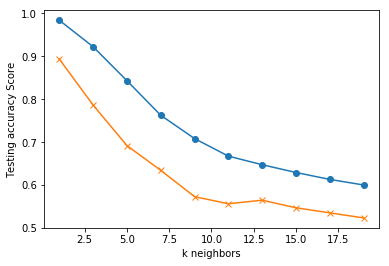

In [32]:
plt.plot(range(1, 20, 2), train_scores, marker='o') 
plt.plot(range(1, 20, 2), test_scores, marker="x") 
plt.xlabel("k neighbors") 
plt.ylabel("Testing accuracy Score")
plt.show()


In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) 
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=1 Test Acc: 0.894
